In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
#data = pd.read_csv('../../RealData/RealData_Small.csv')


In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,2.746560,194.447920
1,1,6.052445,288.489753
2,2,4.312178,247.764920
3,3,5.657870,274.500445
4,4,0.276564,37.136230


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,1000.000000,1000.000000,1000.000000
mean,499.500000,5.055952,243.497049
std,288.819436,2.865645,85.434593
min,0.000000,0.003582,0.537530
25%,249.750000,2.677284,192.695525
50%,499.500000,4.988130,263.943580
75%,749.250000,7.540200,314.262567
max,999.000000,9.982265,354.731051


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
CPU           1000 non-null float64
throughput    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


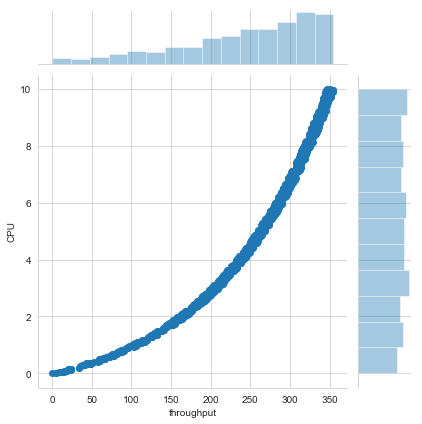

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


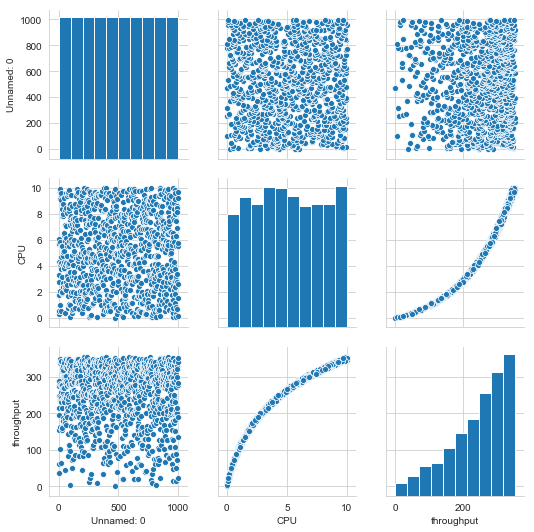

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9595509450961793

In [9]:
datalm = data


In [10]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
#Test data prediction
prediction = rf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.434855,1.763718,1.771625
1,0.687638,4.125349,4.176694
2,0.791815,5.808131,5.803063
3,0.662071,3.965276,4.002094
4,0.449447,1.958887,1.885049
5,0.529711,2.644321,2.523832
6,0.886918,7.850620,7.547950
7,0.896701,7.977538,7.844430
8,0.759665,5.150029,5.336981
9,0.517902,2.369164,2.516755


MAE: 0.1130274282158489
MSE: 0.02187688400873762
RMSE: 0.14790836355236178


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


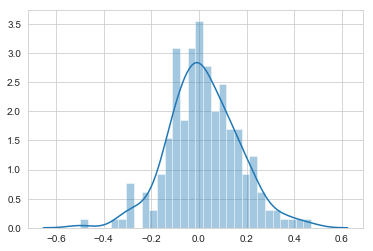

In [12]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
sns.distplot(y_test-prediction,bins=30)

Text(0, 0.5, 'Predicted Y')

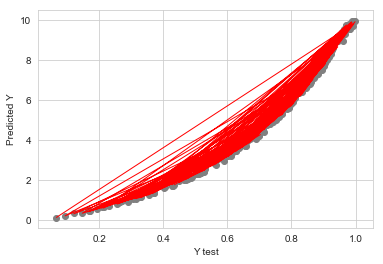

In [13]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=1)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

In [14]:
# save the model to disk
filename = '../models/randomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [15]:
rf.predict([[0.2243476]])

array([0.68153038])